# feature가 2개인 데이터를 SVM으로 분류 연습


## 0. contour plot 함수 준비

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from matplotlib import rc, font_manager

rc('font', family = "NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False


In [2]:
# 먼저 plot 그려주는 함수를 만들자 
# contour plot은 그리는 과정이 조금 귀찮기 때문이다....

def svm_2d_plot(x, y, clf, graphtype = 'line') : 
    ########################################################
    #### 3차원 그리기 위한 메쉬 설정 및 z값 설정
    xx = np.linspace(min(x[:,0]) , max(x[:,0]), 100)
    yy = np.linspace(min(x[:,1]) , max(x[:,1]), 100)

    meshx, meshy = np.meshgrid(xx, yy)
    
    xy = np.vstack([meshx.ravel(), meshy.ravel()]).transpose()
    
    z_decision = clf.decision_function(xy).reshape(meshx.shape)
    ########################################################
    #### 기본 plot 그리기
    ylist = sorted(np.unique(y))

    ########################################################
    #### contour 그리기
    
    ##### 1. 까만 선 컨투어링
    
    if graphtype == 'line' : 
            
        plt.scatter(x[y==ylist[0], 0] , x[y==ylist[0], 1], label = "group {}".format(ylist[0]))
        plt.scatter(x[y==ylist[1], 0] , x[y==ylist[1], 1], label = "group {}".format(ylist[1]))
        plt.contour(meshx, meshy, z_decision, 
               levels = [-1, 0, 1], #이건 어떻게 정해지는 건지 잘 모르겠다. 
               linestyles = ['-', '--', '-'], 
               colors = 'black')
        plt.legend()
#        plt.show()
     ##### 2. contourf로 색깔채운 그래프
    elif graphtype == 'color' : 
        plt.scatter(x[y==ylist[0], 0] , x[y==ylist[0], 1], label = "group {}".format(ylist[0]))
        plt.scatter(x[y==ylist[1], 0] , x[y==ylist[1], 1], label = "group {}".format(ylist[1]))
        plt.contourf(meshx, meshy, z_decision, cmap = plt.cm.Pastel1, alpha = 0.4)
        plt.legend()
#        plt.show()   
    else : 
        return "please choose correct options : line or color" # 나름 예외처리


## 1. 덩어리모양 데이터, linear 분류

In [3]:
# 샘플데이터 만들기

x, y = make_blobs(n_samples = 80, #샘플개수
                  centers = 2, #데이터 뭉텅이 개수. 
                  cluster_std = 1, #뭉텅이 내 데이터의 표준편차
                  random_state = 12)
# 데이터와 라벨 이렇게 두 세트가 나온다. y가 라벨. 

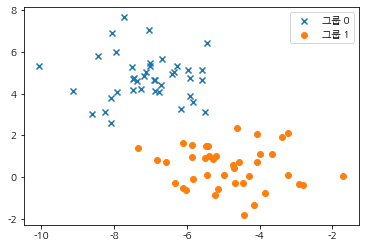

In [4]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], marker = 'x', label = '그룹 0')
plt.scatter(x[y == 1, 0], x[y == 1, 1], label = '그룹 1') #인덱싱이 이렇게도 된다는 게 신기할 따름이다. 
plt.legend()
plt.show()
# 이렇게 생겼다.


In [5]:
# SVM으로 classifier 만들기

clf1 = svm.SVC(kernel = 'linear', C = 10) # 1. classifier 만든다. 슬랙변수 C는 디폴트가 1이다. 
model1 = clf1.fit(x, y) # 2. 기존 데이터에 분류기 fitting 시킨다. 

In [6]:
# 데이터를 fitting 시킨 분류기가 가지는 속성(Attributes)를 살펴보자. 

print( 'n_support_ 각 클래스의 서포트의 개수 : ', model1.n_support_)
print('support_ 각 클래스의 서포트의 인덱스 : ', model1.support_)
print('support_vectors_ 각 클래스의 서포트의 x값 : ', model1.support_vectors_)
print( 'coef_ w벡터 : ' , model1.coef_)
print( 'intercept_ Constants in decision function : ', model1.intercept_)
print('model decision_function : ', model1.decision_function)

n_support_ 각 클래스의 서포트의 개수 :  [1 2]
support_ 각 클래스의 서포트의 인덱스 :  [65 53 76]
support_vectors_ 각 클래스의 서포트의 x값 :  [[-5.50901539  3.1132976 ]
 [-7.35319302  1.41383421]
 [-4.61093807  2.36407996]]
coef_ w벡터 :  [[ 0.65326988 -1.8852319 ]]
intercept_ Constants in decision function :  [8.46873831]
model decision_function :  <bound method BaseSVC.decision_function of SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>


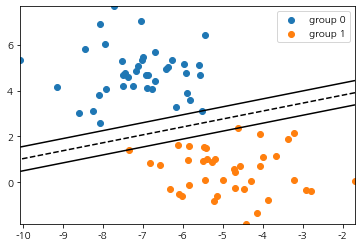

In [7]:
svm_2d_plot(x, y, clf1, graphtype = 'line')


In [8]:
 # 3. 새로운 데이터를 넣어본다. 잘 맞는지...

newData = [[8, 4]]
print(model1.predict(newData)) # predict 할 땐 반드시 2차원 데이터가 들어가야 한다. 그래서 대괄호 두겹

[1]


In [9]:
clf2 = svm.SVC(kernel = 'linear', C = 0.1) # 1. classifier 만든다. 
model2 = clf2.fit(x, y) # 2. 기존 데이터에 분류기 적용시킨다. 

In [10]:
print( 'n_support_ 각 클래스의 서포트의 개수 : ', model2.n_support_)
print('support_ 각 클래스의 서포트의 인덱스 : ', model2.support_)
print('support_vectors_ 각 클래스의 서포트의 x값 : ', model2.support_vectors_)
print( 'coef_ w벡터 : ' , model2.coef_)
print( 'intercept_ Constants in decision function : ', model2.intercept_)
print('model decision_function : ', model2.decision_function)
model2.decision_function

n_support_ 각 클래스의 서포트의 개수 :  [5 6]
support_ 각 클래스의 서포트의 인덱스 :  [ 0 27 33 57 65 31 53 58 63 72 76]
support_vectors_ 각 클래스의 서포트의 x값 :  [[-5.82078703  3.58582513]
 [-5.90422768  3.88712478]
 [-6.16360032  3.26627259]
 [-8.07110339  2.58766045]
 [-5.50901539  3.1132976 ]
 [-6.11129573  1.64053422]
 [-7.35319302  1.41383421]
 [-5.4663288   1.51752926]
 [-5.8537408   1.56388248]
 [-4.0676221   2.08273635]
 [-4.61093807  2.36407996]]
coef_ w벡터 :  [[ 0.30492505 -0.75459207]]
intercept_ Constants in decision function :  [3.81193586]
model decision_function :  <bound method BaseSVC.decision_function of SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>


<bound method BaseSVC.decision_function of SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>

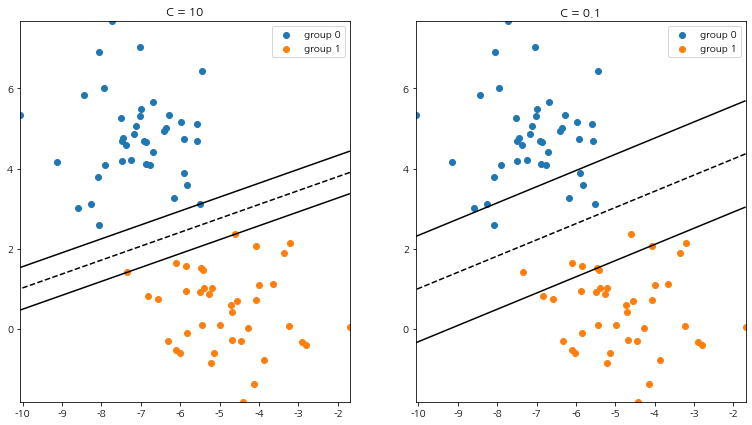

In [11]:
plt.figure(figsize = (13, 7))

#######################################################################

plt.subplot(121)
svm_2d_plot(x, y, clf1, graphtype = 'line')
plt.title('C = 10')

#######################################################################

plt.subplot(122)
svm_2d_plot(x, y, clf2, graphtype = 'line')
plt.title('C = 0.1')

#######################################################################

plt.show()


## 2. iris 데이터, linear 분류

In [12]:
from sklearn import datasets
iris = datasets.load_iris()

In [13]:
#SVM의 전형적인 데이터셋 형태. x와 y 만들어주기. 
X = iris["data"]
Y = iris["target"]

#feature가 두 개인 데이터셋을 만들기 위해 y = 0,1 인 것(sepal length, sepal width)만 남기기. 
X = X[(Y==0) | (Y==1), :]
Y = Y[(Y==0) | (Y==1)]
x = X[:, (0,1)]
y = Y

In [14]:
# 슬랙 변수가 차이 나는 두 분류기 만들어 학습 시키기

clf_iris_2 = svm.SVC(kernel = 'linear', C = 10)
model_iris_2 = clf_iris_2.fit(x,y)

clf_iris_2_1 = svm.SVC(kernel = 'linear', C = 1)
model_iris_2_1 = clf_iris_2_1.fit(x,y)

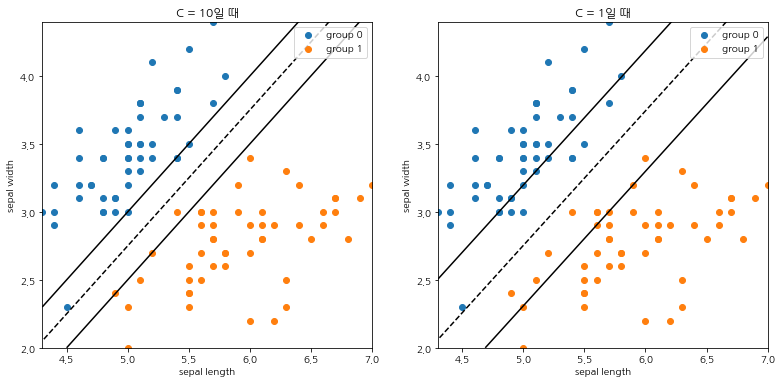

In [15]:

plt. figure(figsize = (13, 6))

plt.subplot(121)
svm_2d_plot(X, Y, clf_iris_2, graphtype = 'line')
plt.title("C = 10일 때")
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.subplot(122)
svm_2d_plot(X, Y, clf_iris_2_1, graphtype = 'line')
plt.title("C = 1일 때")
plt.xlabel('sepal length')
plt.ylabel('sepal width')


plt.show()

In [16]:
# The are two main types of classification SVM algorithms Hard Margin and Soft Margin:
# Hard Margin: aims to find the best hyperplane without tolerating any form of misclassification.
# 하드 마진 : 더 좁고 엄격한 마진
# Soft Margin: we add a degree of tolerance in SVM. In this way we allow the model to voluntary misclassify a few data points 
# if that can lead to identifying a hyperplane able to generalise better to unseen data.
# 소프트마진 : 일반화 가능하고 오버피팅 아니라면 좀 널널한 마진
# Soft Margin SVM can be implemented in Scikit-Learn by adding a C penalty term in svm.SVC. 
# The bigger C and the more penalty the algorithm gets when making a misclassification.
# C가 클수록 하드마진이다. 


## 3. 초승달모양 데이터, 다항함수 매핑 후 linear로 분류

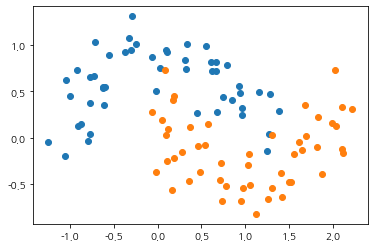

In [17]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
x, y = make_moons(n_samples = 100, noise = 0.2, random_state = 123)

plt.scatter(x[y==0,0], x[y==0,1])
plt.scatter(x[y==1,0], x[y==1,1])

In [18]:
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree = 3)),
        ("scaler", StandardScaler()), #converge 관련 에러가 뜰 때 이걸 해 보라그랬는데 소용이 없었다. 
        ("svm_clf", LinearSVC(C = 5, loss = "hinge", 
                              max_iter = 10000, #왜 자꾸 iteration을 늘리라고 워닝이 뜨는지 모르겠어서 10000으로 함..
                              random_state = 42))
    ])

# 파이프라인 : 단계별로 차례대로 처리해준다. 
# 위의 파이프라인은 scatter plot을 보아하니 직선으로 된 linear SVC만으로는 분류가 어렵겠다는 생각이 드니까
# 1) 3차원 다항식으로 변환해서 고차원에 매핑한다. 
# 2) 거기에 스케일링 해준다(이건 생략). 
# 3) 선형SVC 만든다

polynomial_svm_clf.fit(x, y)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=5, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=10000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

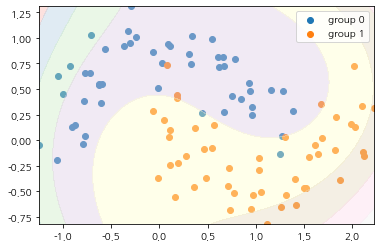

In [19]:
svm_2d_plot(x, y, polynomial_svm_clf, 'color')
#나름 괜찮아 보인다. 

## 4. 초승달모양 데이터, poly kernel로 분류

In [20]:
poly_clf = Pipeline( [ 
                    ("scaler" , StandardScaler() ) , 
                    ("svm_clf" , svm.SVC(kernel = 'poly', degree = 3, coef0 = 10, C = 5 )) 
                    ])
# poly kernel의 파라미터
# degree 차수. 수학식에서 전체 몇 제곱에 해당하는 숫자
# coef0 전체제곱되는 식 안에 더해지는 상수. 디폴트는 0
# C 슬랙변수

poly_clf.fit(x, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=10, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

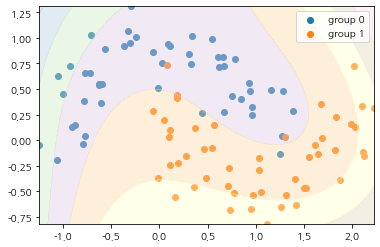

In [21]:
svm_2d_plot(x, y, poly_clf, 'color')
#더 안맞는 것 같아서 한 번 함수 수정하러 감. degree 3 정도가 제일 잘 맞는 듯. 
# 의외로 coef를 조정해주는게 효과가 좋음.. 10이나 100이나 매한가지임. 

## 5. 초승달모양 데이터, RBF kernel로 분류
gamma값과 C값이 어떤 영향을 미치는지 알아보자

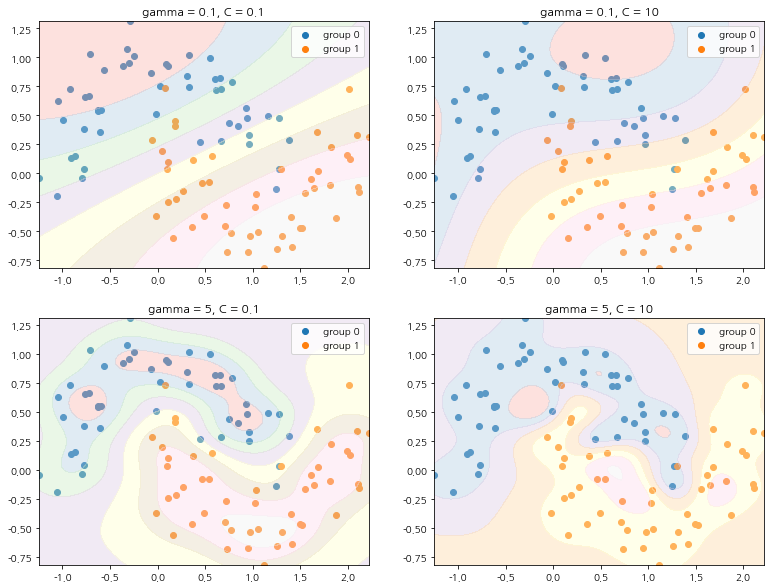

In [22]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.1, 10

hyperparam = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

clf_list = []

for gamma, C in hyperparam : 
    rbf_clf = Pipeline([ 
                    ("scaler", StandardScaler()) , 
                    ("svm_clf" , svm.SVC(kernel = "rbf", gamma = gamma, C = C))
                    ])
    
    rbf_clf.fit(x, y)
    clf_list.append(rbf_clf)

# gamma는 하나의 데이터 샘플이 영향력을 행사하는 거리를 결정한다. 
# gamma는 가우시안 함수의 표준편차와 관련되어 있는데, 클수록 작은 표준편차를 갖는다. 
# 즉, gamma가 클수록 한 데이터 포인터들이 영향력을 행사하는 거리가 짧아지는 반면, gamma가 낮을수록 커진다. 
# gamma가 크면... 그럼.. 오버핏이 나나요? -> 네(그림상)
plt.figure(figsize = (13, 10))
for i in range(0,4) :
    gamma, C = hyperparam[i]
    
    plt.subplot(221+i)
    svm_2d_plot(x, y, clf_list[i], 'color')
    plt.title("gamma = {}, C = {}".format(gamma, C))
plt.show()